# Heart Data
This data is pulled from data.gov to practice machine learning models and data processing.

#### Author
Obinna Jason Nwoke II  
Purpose: Practicing and understanding Machine Learning Models using real-world data

#### Disclaimer
My findings were not and are not to be used to diagnose real patients. This is just a practice example to showcase my knowledge   
and understanding of ML models and data.

### Understanding our data
We are going to refer to each patient (row) as a *record*
Each record has the following:

- Age - The age of the person
- Sex - The gender of the person (Male or Female)
- ChestPainType - The type of the chest pain
- RestingBP - Resting blood pressure (normal is < 120/80 mmHG) Source: [CDC](https://www.cdc.gov)
- Cholesterol - Blood test that measures the amount of cholesterol and certain fats in your blood.
    - normal levels: < 200 mg/dl [Uptodate](https://www.uptodate.com)
- FastingBS - A measure of glucose in the bloodstream (normal is < 99mg/dL) Source: [CDC](https://www.cdc.gov)
- RestingECG - Measures your heart's electrical function
- MaxHR - A person's max heart rate
- ExerciseAngina - The pain in the chest that results from exercise, stress, or other things that make the heart work harder [Harvard Health](https://www.health.harvard.edu)
- Oldpeak - ST depression induced by exercise relative to rest [TowardsDataScience](https://towardsdatascience.com)
    - 0: downsloping
    - 1: flat
    - 2: upsloping
- ST_Slope - ST segnemnt shift relative to exercise-induced increments in heart rate
- Heart Disease - If the record has a heart disease (0 for no, 1 for yes)

### We are looking to find out if a patient has a heart disease (1) or if they don't (0)

In [364]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = './heart.csv'
heart_data = pd.read_csv(file)
heart_data.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

#### Exploring the data

In [365]:
heart_data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [366]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Male vs. Female and Heart Disease

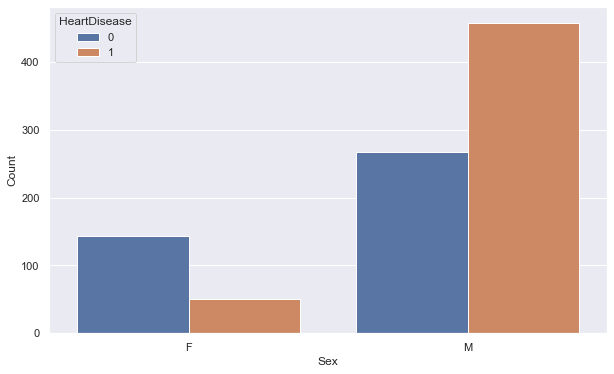

In [367]:
sns.set(rc={"figure.figsize": (10, 6)})
gender = heart_data[['Sex', 'HeartDisease']].groupby(['Sex', 'HeartDisease'])[['HeartDisease']].count()
gender = gender.rename(columns={'HeartDisease': 'Count'}).reset_index()
g = sns.barplot(data=gender, x='Sex', y='Count', hue='HeartDisease')

We can tell that from this data set, men are more likely to get a heart disease than women

### ST_Slope and Heart Disease

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'ST_Slope vs. Heart Disease')]

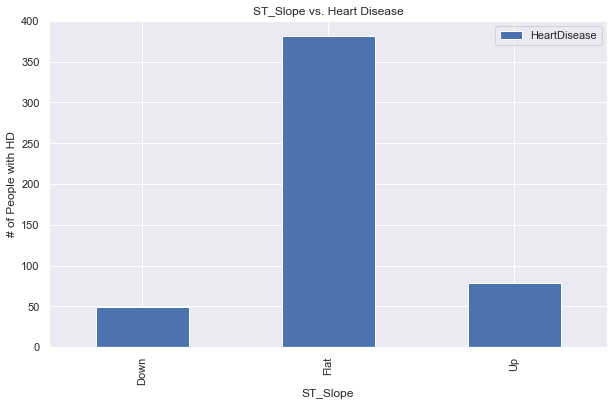

In [368]:
sns.set()
heart_data[['ST_Slope', 'HeartDisease']].groupby("ST_Slope").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="ST_Slope vs. Heart Disease")

### ExerciseAngina and Heart Disease

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'ExerciseAngina vs. Heart Disease')]

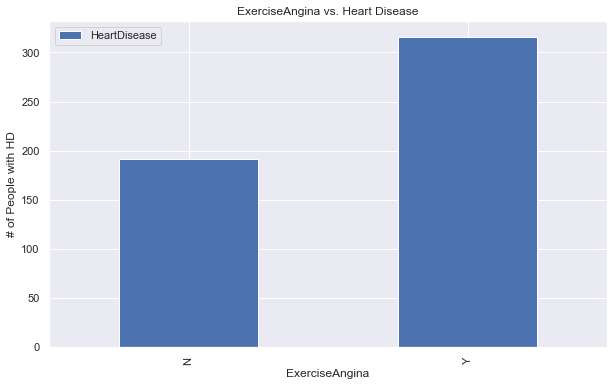

In [369]:
sns.set()
heart_data[['ExerciseAngina', 'HeartDisease']].groupby("ExerciseAngina").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="ExerciseAngina vs. Heart Disease")

### Chest Pain Type ASY and Heart Disease

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'Chest Pain Type vs. Heart Disease')]

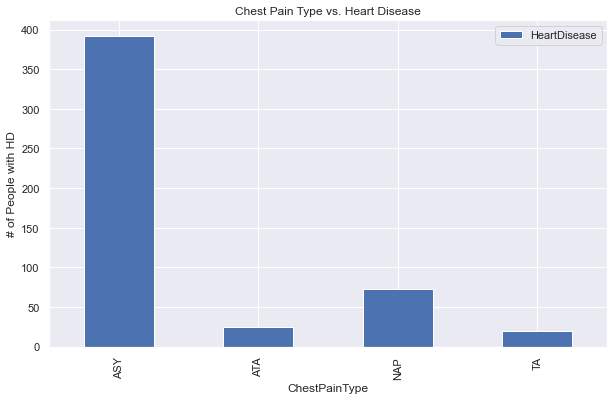

In [370]:
sns.set()
heart_data[['ChestPainType', 'HeartDisease']].groupby("ChestPainType").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="Chest Pain Type vs. Heart Disease")

### Preparing the Machine Learning Model
This is a classification problem, so we need a classification model, NOT regression

In [371]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

independent_variables = heart_data.columns[:-1]
target_variable = heart_data.columns[-1]

x = heart_data[independent_variables]
y = heart_data[[target_variable]]

x = pd.get_dummies(x)
x = StandardScaler().fit_transform(x)
y = y['HeartDisease']

In [372]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LogisticRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8652173913043478

### Feature Importance

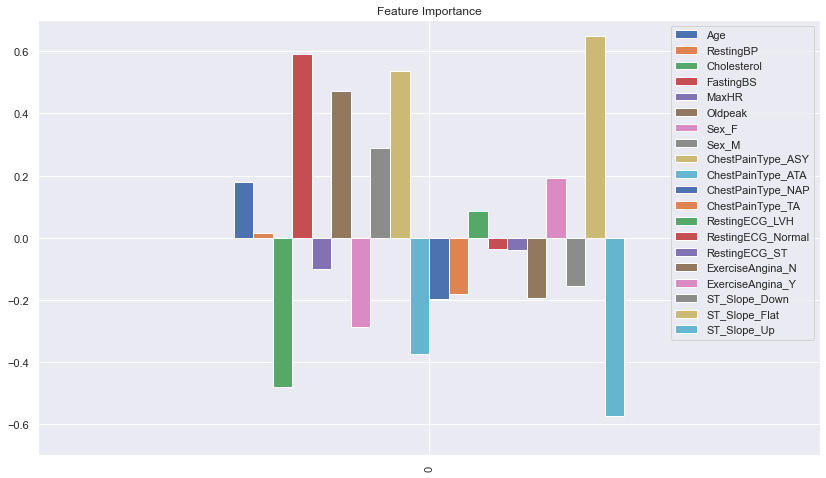

In [373]:
sns.set(rc={"figure.figsize": (14, 8)})
importance = model.coef_
fig = pd.DataFrame(importance, columns=pd.get_dummies(heart_data[independent_variables]).columns).plot(kind='bar').set(ylim=(-0.70, 0.70), title='Feature Importance')

### Create a test dataframe with random values to predict Heart Disease
First, create a function that will generate a dataframe with the necessary values

In [374]:
import random

def populate_test_df(dictionary=None, entries: int = 10):
    if dictionary is None:
       dictionary = {"Age": [],
          "Sex": [],
          "ChestPainType": [],
          "RestingBP": [],
          "Cholesterol": [],
          "FastingBS": [],
          "RestingECG": [],
          "MaxHR": [],
          "ExerciseAngina": [],
          "Oldpeak": [],
          "ST_Slope": []}
    for i in range(entries):
        # age between lower bound (28) and upper bound (77)
        dictionary['Age'].append(random.choice([x for x in range(28, 78)]))
        # sex: either male or female
        dictionary['Sex'].append(random.choice(['M', 'F']))
        # chest pain from used dataframe
        dictionary['ChestPainType'].append(random.choice(heart_data['ChestPainType'].value_counts().index))
        # RestingBP
        dictionary['RestingBP'].append(random.choice([x for x in range(80, 201)]))
        # Cholesterol
        dictionary['Cholesterol'].append(random.choice([x for x in range(100, 350)]))
        # FastingBS
        dictionary['FastingBS'].append(random.choice([0, 1]))
        # RestingECG
        dictionary['RestingECG'].append(random.choice(['Normal', 'LVH', 'ST']))
        # MaxHR
        dictionary['MaxHR'].append(random.choice([x for x in range(60, 201)]))
        # ExerciseAngina
        dictionary['ExerciseAngina'].append(random.choice(['Y', 'N']))
        # Oldpeak
        dictionary['Oldpeak'].append(round(random.uniform(-2, 4.5), 1))
        # ST_Slope
        dictionary['ST_Slope'].append(random.choice(['Flat', 'Up', 'Down']))
    return pd.DataFrame(dictionary)

### Check your test dataframe

In [375]:
test_df = populate_test_df(entries=1000)
test_df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   75   M           NAP        125          323          0     Normal    181   
1   75   F           NAP         94          170          1     Normal     78   
2   60   M            TA        106          185          1         ST    135   
3   72   F           ASY        132          197          0     Normal    200   
4   62   F           ATA         96          117          0     Normal    145   

  ExerciseAngina  Oldpeak ST_Slope  
0              Y      2.9     Down  
1              Y     -1.2     Down  
2              N     -1.7     Flat  
3              Y      2.6     Flat  
4              N      0.4     Down

### Create a function to turn your data to fit your ML model

In [376]:
def transform(df):
    """
    This transforms the dataframe directly into the test format for the model
    """
    x = df[df.columns[:]]
    x = pd.get_dummies(x)
    
    dummies_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
    
    final_df = pd.DataFrame(columns=dummies_cols)
    final_df = final_df.append(x)
    final_df = StandardScaler().fit_transform(final_df)
    return final_df

### Get Your Output

In [377]:
test = transform(test_df)
predictions = model.predict(test)
predicted_outcome = pd.DataFrame(columns=['Predicted_HeartDisease'], data=predictions)

### Merge the Two Dataframes

In [378]:
result = pd.concat([test_df, predicted_outcome], axis=1)
result

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     75   M           NAP        125          323          0     Normal   
1     75   F           NAP         94          170          1     Normal   
2     60   M            TA        106          185          1         ST   
3     72   F           ASY        132          197          0     Normal   
4     62   F           ATA         96          117          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
995   65   M           NAP        151          155          1        LVH   
996   35   F           ATA        179          165          0     Normal   
997   48   M            TA        118          141          1         ST   
998   61   M           ASY        180          191          0     Normal   
999   42   F           ATA        159          298          1     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  Predicted_HeartDisease  
0      181              Y      2.9     Down                       0  
1       78              Y     -1.2     Down                       1  
2      135              N     -1.7     Flat                       1  
3      200              Y      2.6     Flat                       1  
4      145              N      0.4     Down                       0  
..     ...            ...      ...      ...                     ...  
995    199              Y      3.3       Up                       1  
996     71              Y      1.6       Up                       0  
997     60              N      1.1       Up                       1  
998    121              Y      1.3     Flat                       1  
999    187              Y      1.7     Down                       0  

[1000 rows x 12 columns]

### Compare Visualizations

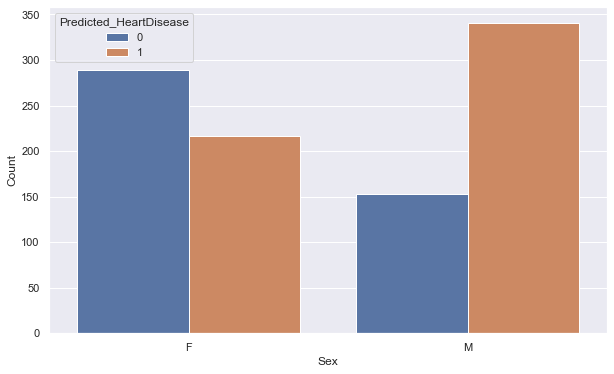

In [379]:
sns.set(rc={"figure.figsize": (10, 6)})
gender = result[['Sex', 'Predicted_HeartDisease']].groupby(['Sex', 'Predicted_HeartDisease'])[['Predicted_HeartDisease']].count()
gender = gender.rename(columns={'Predicted_HeartDisease': 'Count'}).reset_index()
g = sns.barplot(data=gender, x='Sex', y='Count', hue='Predicted_HeartDisease')

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'ST_Slope vs. Heart Disease')]

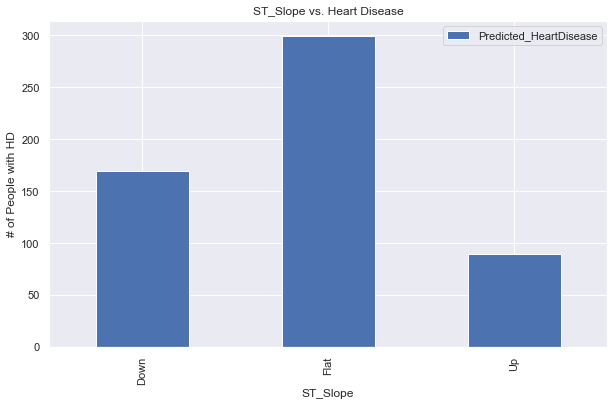

In [380]:
sns.set()
result[['ST_Slope', 'Predicted_HeartDisease']].groupby("ST_Slope").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="ST_Slope vs. Heart Disease")

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'ExerciseAngina vs. Heart Disease')]

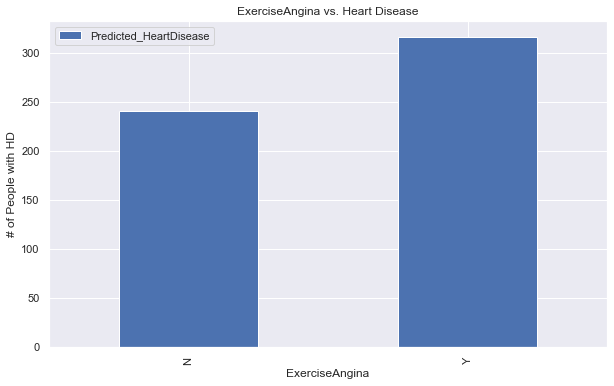

In [381]:
sns.set()
result[['ExerciseAngina', 'Predicted_HeartDisease']].groupby("ExerciseAngina").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="ExerciseAngina vs. Heart Disease")

[Text(0, 0.5, '# of People with HD'),
 Text(0.5, 1.0, 'Chest Pain Type vs. Heart Disease')]

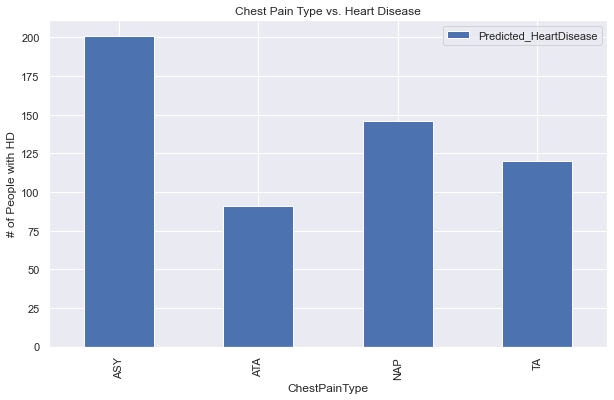

In [382]:
sns.set()
result[['ChestPainType', 'Predicted_HeartDisease']].groupby("ChestPainType").sum().plot(kind='bar', figsize=(10, 6)).set(ylabel="# of People with HD", title="Chest Pain Type vs. Heart Disease")

## Findings
Based on the **initial explortion** of the data, the following were hypothesized:
- Males were more likely to have a heart disease than compared to females
- People with a flat or downward sloping ST_Slope could be linked to a heart disease
- People with exercise angina could be linked to a heart disease
- People with chest pain type ASY could be liked to a heart disease

When **creating the machine learning model**, a logistic regression was used to generate yes (1) or no (0) values, since this was identified   
as a classification problem. When computing the accuracy of the ML model, it generated a **score > 82** for consecutive runs.

When creating a set of data to test the predictions, our findings were as follows:
- Males were more likely to have a heart disease than compared to women
    - And conversely, women were more likely to **NOT** have a heart disease than compared to men
- People with a flat or downward sloping ST_Slope could be linked to a heart disease
    - **Flat** and having a heart disease was much more prevalent than downward or upward
- People with exercise angina could be linked to a heart disease
- People with chest pain type ASY could be linked to a heart disease

When using my own randomly generated sample of 1000 patients, the initial hypotheses were proved to hold some truth. Overall  
it appears that, with this set of data and features, the best feature that could predict if a patient has a heart disease  
is a flat ST slope.


#### Disclaimer
My findings were not and are not to be used to diagnose real patients. This is just a practice example to showcase my knowledge   
and understanding of ML models and data.